# 100GtC pulse runs with fair v2.1.3

- Calibration v1.4.1
- Against pre-industrial conditions (present-day would need spin-up of the carbon cycle boxes, so much more complex)

In [1]:
import os
import fair
from fair import FAIR
from fair.interface import fill, initialise
from fair.io import read_properties
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from tqdm.auto import tqdm
import xarray as xr

In [2]:
fair.__version__

'2.1.3'

In [3]:
scenarios = ['100GtC-pulse']

In [4]:
cal_df = pd.read_csv('../data/calibration/v1.4.1/calibrated_constrained_parameters.csv', index_col=0)

In [5]:
species = ['CO2', 'CH4', 'N2O']
properties = {
    "CO2": {
        'type': 'co2',
        'input_mode': 'emissions',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False
    },
    "CH4": {
        'type': 'ch4',
        'input_mode': 'emissions',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False
    },
    "N2O": {
        'type': 'n2o',
        'input_mode': 'emissions',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False
    }
}

In [6]:
f = FAIR()
f.define_time(0, 1000, 1)
f.define_scenarios(scenarios)
f.define_configs(cal_df.index)
    
# declare species and properties
f.define_species(species, properties)
    
f.allocate()
    
# fill emissions: zero for non-CO2
f.emissions.loc[dict(specie="CH4")] = 0
f.emissions.loc[dict(specie="N2O")] = 0
    
# constant pre-industrial concentration for non-CO2 GHGs
f.concentration.loc[dict(specie='CH4')] = 808.2490285
f.concentration.loc[dict(specie='N2O')] = 273.021047
    
# fill emissions of CO2 for each scenario
f.emissions.loc[dict(specie="CO2", scenario="100GtC-pulse", timepoints=0.5)] = 100 * 44.009 / 12.011
f.emissions.loc[dict(specie="CO2", scenario="100GtC-pulse", timepoints=np.arange(1.5, 1000))] = 0
    
# Get default species configs
f.fill_species_configs()

# Climate response
fill(f.climate_configs['ocean_heat_capacity'], cal_df.loc[:,'clim_c1':'clim_c3'])
fill(f.climate_configs['ocean_heat_transfer'], cal_df.loc[:,'clim_kappa1':'clim_kappa3'])
fill(f.climate_configs['deep_ocean_efficacy'], cal_df.loc[:,'clim_epsilon'])
fill(f.climate_configs['gamma_autocorrelation'], cal_df.loc[:,'clim_gamma'])
fill(f.climate_configs['stochastic_run'], False)

# carbon cycle
fill(f.species_configs['iirf_0'], cal_df.loc[:, 'cc_r0'].values.squeeze(), specie='CO2')
fill(f.species_configs['iirf_airborne'], cal_df.loc[:, 'cc_rA'].values.squeeze(), specie='CO2')
fill(f.species_configs['iirf_uptake'], cal_df.loc[:, 'cc_rU'].values.squeeze(), specie='CO2')
fill(f.species_configs['iirf_temperature'], cal_df.loc[:, 'cc_rT'].values.squeeze(), specie='CO2')

# Scale CO2 forcing based on its 4xCO2 calibration
fill(f.species_configs["forcing_scale"], cal_df["fscale_CO2"].values.squeeze(), specie='CO2')

# initial condition of CO2 concentration (but not baseline for forcing calculations)
fill(f.species_configs['baseline_concentration'], 284.3169988, specie='CO2')
fill(f.species_configs['baseline_concentration'], 808.2490285, specie='CH4')
fill(f.species_configs['baseline_concentration'], 273.021047, specie='N2O')
    
# set initial conditions
initialise(f.concentration, f.species_configs['baseline_concentration'])
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.airborne_emissions, 0)
initialise(f.cumulative_emissions, 0)
    
f.run()

Running 841 projections in parallel:   0%|          | 0/1000 [00:00<?, ?timesteps/s]

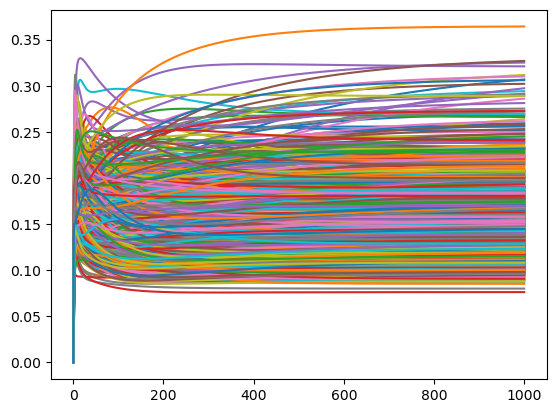

In [7]:
pl.plot(f.temperature.sel(layer=0, scenario='100GtC-pulse'));

(-1.0, 10.0)

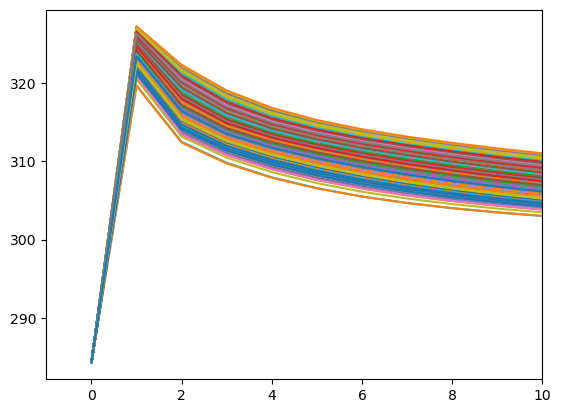

In [8]:
pl.plot(f.concentration.sel(specie='CO2', scenario='100GtC-pulse'));
pl.xlim(-1, 10)

In [9]:
f.concentration

<xarray.DataArray (timebounds: 1001, scenario: 1, config: 841, specie: 3)>
array([[[[284.3169988 , 808.2490285 , 273.021047  ],
         [284.3169988 , 808.2490285 , 273.021047  ],
         [284.3169988 , 808.2490285 , 273.021047  ],
         ...,
         [284.3169988 , 808.2490285 , 273.021047  ],
         [284.3169988 , 808.2490285 , 273.021047  ],
         [284.3169988 , 808.2490285 , 273.021047  ]]],


       [[[325.98015373, 808.2490285 , 273.021047  ],
         [321.98119654, 808.2490285 , 273.021047  ],
         [323.47228254, 808.2490285 , 273.021047  ],
         ...,
         [322.59749359, 808.2490285 , 273.021047  ],
         [323.63619739, 808.2490285 , 273.021047  ],
         [323.41513615, 808.2490285 , 273.021047  ]]],


       [[[319.73946559, 808.2490285 , 273.021047  ],
         [314.88557717, 808.2490285 , 273.021047  ],
...
         [294.5233203 , 808.2490285 , 273.021047  ],
         [294.52331591, 808.2490285 , 273.021047  ]]],


       [[[294.52364795, 808.2490285 , 273.021047  ],
         [294.52329716, 808.2490285 , 273.021047  ],
         [294.52331896, 808.2490285 , 273.021047  ],
         ...,
         [294.52330383, 808.2490285 , 273.021047  ],
         [294.52332019, 808.2490285 , 273.021047  ],
         [294.52331582, 808.2490285 , 273.021047  ]]],


       [[[294.52364465, 808.2490285 , 273.021047  ],
         [294.52329708, 808.2490285 , 273.021047  ],
         [294.52331886, 808.2490285 , 273.021047  ],
         ...,
         [294.52330375, 808.2490285 , 273.021047  ],
         [294.52332009, 808.2490285 , 273.021047  ],
         [294.52331574, 808.2490285 , 273.021047  ]]]])
Coordinates:
  * timebounds  (timebounds) float64 0.0 1.0 2.0 3.0 ... 997.0 998.0 999.0 1e+03
  * scenario    (scenario) <U12 '100GtC-pulse'
  * config      (config) int64 1234 2451 5859 5883 ... 1592589 1594247 1597937
  * specie      (specie) <U3 'CO2' 'CH4' 'N2O'

In [ ]:
pl.plot(f.airborne_fraction.sel(specie='CO2', scenario='100GtC-pulse'));
pl.xlim(-1, 500)

(-1.0, 500.0)

In [ ]:
f.temperature.sel(layer=0, scenario='100GtC-pulse').to_pandas().to_csv('../output/100GtCpulse_temperature_fair2.1.3_cal1.4.1.csv')